In [33]:
%cd /Users/siddh/Desktop/SID/Projects/AutoMLite/automl

/Users/siddh/Desktop/SID/projects/AutoMLite/automl


In [34]:
import pandas as pd
from src.preprocessing.preprocessor import DataPreprocessor
from src.feature_engineering.feature_engineer import FeatureEngineer
from src.model_selection.model_registry import ModelWrapper
from src.evaluation.reporting import report_performance, plot_confusion_matrix
from src.evaluation.shap_explainer import explain_model
from src.optimization.optuna_optimizer import optimize_model
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [35]:
df = pd.read_csv('your_data.csv')
X = df.drop('target', axis=1)
y = df['target']

In [36]:
pre = DataPreprocessor()
X_proc = pre.fit_transform(X)

In [37]:

X_proc_df = pd.DataFrame(X_proc)
fe = FeatureEngineer(degree=2)
X_fe = fe.fit_transform(X_proc_df)

### Evaluation/Prediction

In [30]:
model_spaces = {
    'logistic_regression': {
        'model': LogisticRegression,
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier,
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [None, 5, 10]
        }
    },
    'svm': {
        'model': SVC,
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'mlp': {
        'model': MLPClassifier,
        'params': {
            'hidden_layer_sizes': [(50,), (100,)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam'],
            'alpha': [0.0001, 0.001]
        }
    }
}

In [31]:

best_score = -float('inf')
best_model_name = None
best_model = None
best_params = None

for name, info in model_spaces.items():
    print(f"Optimizing {name}...")
    params = optimize_model(info['model'], info['params'], X_fe, y, scoring='accuracy', n_trials=10)
    model = ModelWrapper(name, **params)
    model.fit(X_fe, y)
    score = cross_val_score(model.model, X_fe, y, scoring='accuracy', cv=3).mean()
    print(f"{name} CV accuracy: {score:.4f}")
    if score > best_score:
        best_score = score
        best_model_name = name
        best_model = model
        best_params = params

print(f"\nBest model: {best_model_name} with CV accuracy: {best_score:.4f}")
print("Best hyperparameters:", best_params)

[I 2025-07-25 13:30:22,292] A new study created in memory with name: no-name-37d706bd-2dad-4f0d-9947-b7e92d71ef39
[I 2025-07-25 13:30:22,317] Trial 0 finished with value: 0.8549675863108699 and parameters: {'C': 1, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.8549675863108699.
[I 2025-07-25 13:30:22,328] Trial 1 finished with value: 0.8497663199155735 and parameters: {'C': 10, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.8549675863108699.
[I 2025-07-25 13:30:22,336] Trial 2 finished with value: 0.8549675863108699 and parameters: {'C': 1, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.8549675863108699.
[I 2025-07-25 13:30:22,343] Trial 3 finished with value: 0.8549675863108699 and parameters: {'C': 1, 'solver': 'liblinear'}. Best is trial 0 with value: 0.8549675863108699.
[I 2025-07-25 13:30:22,348] Trial 4 finished with value: 0.8497663199155735 and parameters: {'C': 10, 'solver': 'liblinear'}. Best is trial 0 with value: 0.8549675863108699.
[I 2025-07-25 13:30:22,353] Tri

Optimizing logistic_regression...
logistic_regression CV accuracy: 0.8550
Optimizing random_forest...


[I 2025-07-25 13:30:22,560] Trial 0 finished with value: 0.7747625508819539 and parameters: {'n_estimators': 100, 'max_depth': 5}. Best is trial 0 with value: 0.7747625508819539.
[I 2025-07-25 13:30:22,653] Trial 1 finished with value: 0.8099653248906981 and parameters: {'n_estimators': 50, 'max_depth': None}. Best is trial 1 with value: 0.8099653248906981.
[I 2025-07-25 13:30:22,831] Trial 2 finished with value: 0.7898386853610734 and parameters: {'n_estimators': 100, 'max_depth': None}. Best is trial 1 with value: 0.8099653248906981.
[I 2025-07-25 13:30:23,009] Trial 3 finished with value: 0.8096638022011157 and parameters: {'n_estimators': 100, 'max_depth': None}. Best is trial 1 with value: 0.8099653248906981.
[I 2025-07-25 13:30:23,101] Trial 4 finished with value: 0.7898386853610734 and parameters: {'n_estimators': 50, 'max_depth': None}. Best is trial 1 with value: 0.8099653248906981.
[I 2025-07-25 13:30:23,278] Trial 5 finished with value: 0.7899894467058646 and parameters: {'n

random_forest CV accuracy: 0.7748
Optimizing svm...
svm CV accuracy: 0.8700
Optimizing mlp...


/Users/siddh/Desktop/SID/projects/AutoMLite/venv/lib/python3.13/site-packages/optuna/distributions.py:518: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
/Users/siddh/Desktop/SID/projects/AutoMLite/venv/lib/python3.13/site-packages/optuna/distributions.py:518: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/Users/siddh/Desktop/SID/projects/AutoMLite/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/siddh/Desktop/SID/projects/AutoMLite/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:7

mlp CV accuracy: 0.8449

Best model: svm with CV accuracy: 0.8700
Best hyperparameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 'auto'}


/Users/siddh/Desktop/SID/projects/AutoMLite/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.88      0.92      0.90        99
           1       0.92      0.87      0.89       101

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200



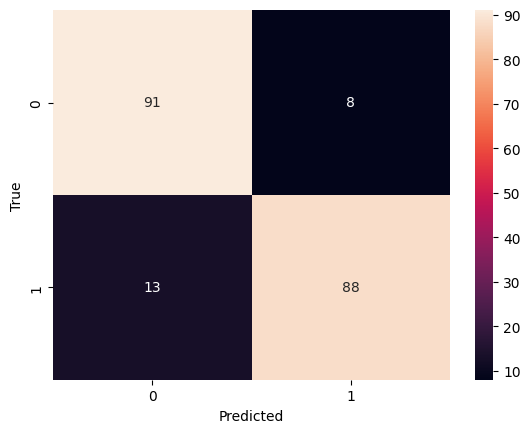

SHAP explainability is limited for this model type.


In [32]:
y_pred = best_model.predict(X_fe)
report_performance(y, y_pred)
plot_confusion_matrix(y, y_pred, labels=[0, 1])
if best_model_name in ['random_forest', 'xgboost', 'logistic_regression']:
    explain_model(best_model.model, X_fe)
else:
    print("SHAP explainability is limited for this model type.")